# Febuary

In [5]:
## import data ##
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import pandas as pd
import time
from sklearn.cluster import KMeans

In [2]:
## modify data ##
data = pd.DataFrame.from_csv("yellow_tripdata_2016-02.csv")
data = data.rename_axis(None)
data['VendorID'] = data.index
data['Index'] = range(0, len(data.index))
data = data.set_index('Index')

In [4]:
print(len(data.index))
data.head(1)

11382049


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,VendorID
Index,,,,,,,,,,,,,,,,,,,
0,2016-02-25 17:24:20,2016-02-25 17:27:20,2,0.7,-73.94725,40.763771,1,N,-73.992012,40.73539,2,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2


# Q1

In [6]:
plpk_lon = data['pickup_longitude']
plpk_lat = data['pickup_latitude']

In [7]:
del1 = np.append(np.where(plpk_lon<-124.904),np.where(plpk_lon>-66.386))
del2 = np.append(np.where(plpk_lat<24.904),np.where(plpk_lat>49.433))
del3 = np.append(del1, del2)
print(len(del3)/11382049)

0.031077620558477653


In [8]:
u_place_pick = np.column_stack((plpk_lon, plpk_lat))
place_pick = np.delete(u_place_pick, del3, 0)#numpy.delete(arr, obj, axis=None)

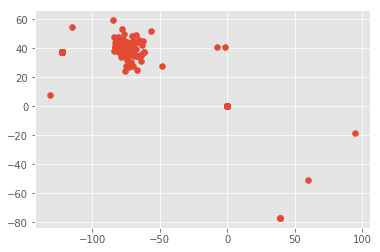

In [9]:
##### befor #####
plt.scatter(plpk_lon, plpk_lat)
plt.show()

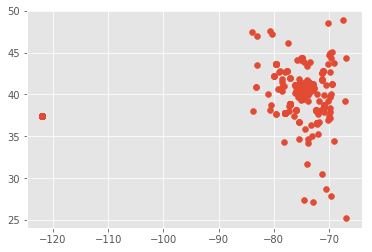

In [10]:
plt.close()
##### after #####
plt.scatter(place_pick[:,0], place_pick[:,1])
plt.show()

In [11]:
kmeans_pck = KMeans(n_clusters=10)
kmeans_pck.fit(place_pick)
centroids_pck = kmeans_pck.cluster_centers_
label_pck = kmeans_pck.labels_
print(centroids_pck)
print(label_pck)

[[ -73.99695062   40.71820494]
 [-121.93321714   37.38940638]
 [ -73.95850469   40.78254303]
 [ -73.78402397   40.64714131]
 [ -73.97697683   40.76173834]
 [ -73.99157668   40.74409833]
 [ -79.51040713   43.06048436]
 [ -73.87209254   40.76989663]
 [ -77.42328119   38.08634321]
 [ -71.47929919   36.17786347]]
[2 5 5 ..., 2 7 7]


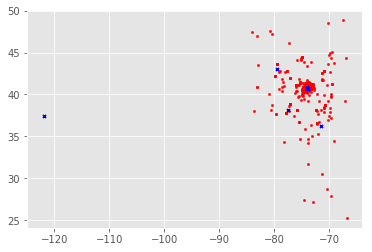

In [13]:
plt.close()
plt.scatter(place_pick[:,0], place_pick[:,1], c = 'r', s = 5)
plt.scatter(centroids_pck[:,0], centroids_pck[:,1], marker = "x", c = 'b', s = 10, linewidths = 5, zorder = 10)
plt.show()

In [14]:
pldp_lon = data['dropoff_longitude']
pldp_lat = data['dropoff_latitude']
del1 = np.append(np.where(pldp_lon<-124.904),np.where(pldp_lon>-66.386))
del2 = np.append(np.where(pldp_lat<24.904),np.where(pldp_lat>49.433))
del3 = np.append(del1, del2)
u_place_drop = np.column_stack((pldp_lon, pldp_lat))
place_drop = np.delete(u_place_drop, del3, 0)#numpy.delete(arr, obj, axis=None)

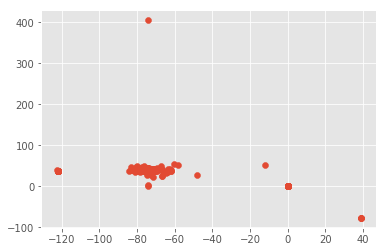

In [15]:
##### befor #####
plt.close()
plt.scatter(pldp_lon, pldp_lat)
plt.show()

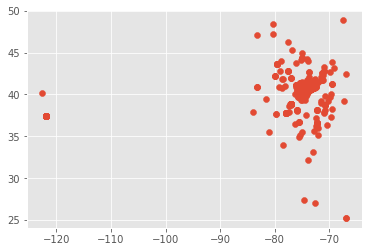

In [16]:
##### after #####
plt.close()
plt.scatter(place_drop[:,0], place_drop[:,1])
plt.show()

In [20]:
kmeans_drp = KMeans(n_clusters=10)
kmeans_drp.fit(place_drop)

centroids_drp = kmeans_drp.cluster_centers_
label_drp = kmeans_drp.labels_

print(centroids_drp)
print(label_drp)

[[ -73.9824008    40.75518037]
 [-121.94563723   37.44082447]
 [ -73.96028258   40.78008459]
 [ -73.78021034   40.66484756]
 [ -73.8820672    40.75855357]
 [ -73.92981985   40.8352898 ]
 [ -73.96432272   40.68402247]
 [ -73.99965991   40.72688458]
 [ -72.14062076   36.17304209]
 [ -78.48330923   40.50747573]]
[7 0 0 ..., 4 0 2]


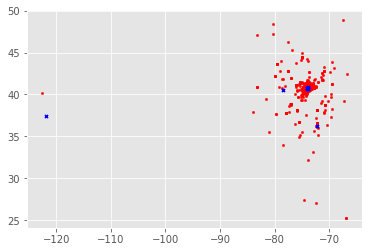

In [21]:
plt.close()
plt.scatter(place_drop[:,0], place_drop[:,1], c = 'r', s = 5)
plt.scatter(centroids_drp[:,0], centroids_drp[:,1], marker = "x", c = 'b', s = 10, linewidths = 5, zorder = 10)

plt.show()

# Q2

In [22]:
formate = '%Y-%m-%d %H:%M:%S'

In [23]:
bi = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]
def time_obj(dfrow):
    return time.strptime(dfrow, formate).tm_hour

In [24]:
pick_h = list(map(time_obj, data['tpep_pickup_datetime']))

In [25]:
drop_h = list(map(time_obj, data['tpep_dropoff_datetime']))

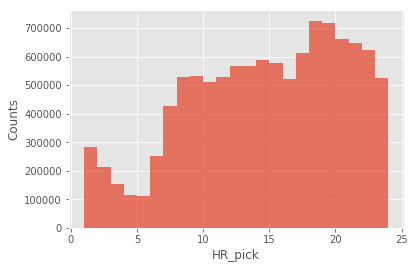

In [26]:
plt.close()
plt.hist(pick_h, bins=bi, alpha=0.75)
plt.xlabel('HR_pick')
plt.ylabel('Counts')
plt.show()

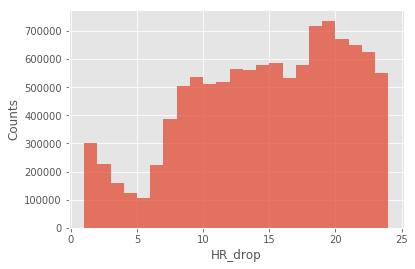

In [27]:
plt.close()
plt.hist(drop_h, bins=bi,alpha=0.75)
plt.xlabel('HR_drop')
plt.ylabel('Counts')
plt.show()

In [28]:
uni_p, cnt_p = np.unique(pick_h, return_counts=True)
uni_d, cnt_d = np.unique(drop_h, return_counts=True)

In [29]:
dict(zip(uni_p, cnt_p))

{0: 395273,
 1: 282393,
 2: 212809,
 3: 152596,
 4: 115809,
 5: 112458,
 6: 252505,
 7: 427266,
 8: 529063,
 9: 530303,
 10: 509816,
 11: 530205,
 12: 565604,
 13: 567698,
 14: 589291,
 15: 577399,
 16: 522086,
 17: 613536,
 18: 725705,
 19: 716167,
 20: 660626,
 21: 646869,
 22: 621577,
 23: 524995}

In [30]:
dict(zip(uni_d, cnt_d))

{0: 427525,
 1: 302842,
 2: 226683,
 3: 160917,
 4: 124626,
 5: 104747,
 6: 221659,
 7: 386479,
 8: 503640,
 9: 537126,
 10: 512222,
 11: 519263,
 12: 565526,
 13: 561139,
 14: 578808,
 15: 585437,
 16: 532472,
 17: 578660,
 18: 716845,
 19: 736453,
 20: 671698,
 21: 648730,
 22: 626406,
 23: 552146}

# Q3

In [31]:
def distance(dfrow):
    if(dfrow > 15):
        return 1
    else:
        return 0

In [32]:
data['dist'] = list(map(distance, data['trip_distance']))

In [33]:
long = data.loc[np.where(data['dist']==1)]
short = data.loc[np.where(data['dist']==0)]

In [34]:
del1 = np.append(np.where(data['trip_distance'] > 300),np.where(data['fare_amount']>10000))
del2 = np.append(np.where(data['trip_distance'] == 0),np.where(data['fare_amount'] == 0))
del3 = np.append(del1, del2)
u_place_pick = np.column_stack((data['trip_distance'], data['fare_amount']))
place_pick = np.delete(u_place_pick, del1, 0)

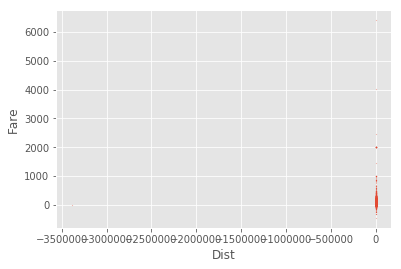

In [35]:
plt.close()
plt.scatter(place_pick[:,0], place_pick[:,1],alpha = '0.3', s = 0.5)
plt.xlabel('Dist')
plt.ylabel('Fare')
plt.show()

In [36]:
#### tip percentage ####
tip_percentage = long['tip_amount']/long['fare_amount']
tp_long = pd.DataFrame({'tp':tip_percentage})
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
group_names = [0,1,2,3,4,5,6,7,8,9]
tp_long['cate'] = pd.cut(tp_long['tp'],bins, labels = group_names)

tip_percentage = short['tip_amount']/short['fare_amount']
tp_short = pd.DataFrame({'tp':tip_percentage})
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
group_names = [0,1,2,3,4,5,6,7,8,9]
tp_short['cate'] = pd.cut(tp_short['tp'],bins, labels = group_names)

tp_short = tp_short.dropna(axis=0)
tp_long = tp_long.dropna(axis=0)

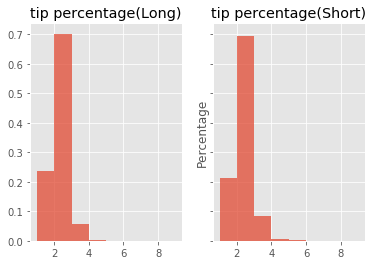

In [37]:
plt.close()
fig, axes = plt.subplots(1, 2, sharey=True)
ax0, ax1= axes.flatten()
ax0.hist(tp_long['cate'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9],normed=1,alpha=0.75)
ax1.hist(tp_short['cate'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9],normed=1,alpha=0.75)
ax0.set_title('tip percentage(Long)')
ax1.set_title('tip percentage(Short)')
plt.ylabel('Percentage')
plt.show()

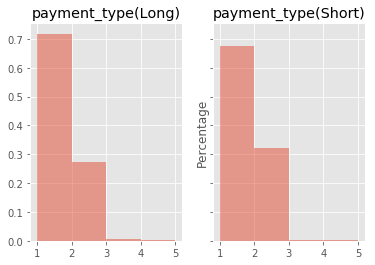

In [38]:
plt.close()
fig, axes = plt.subplots(1, 2, sharey=True)
ax0, ax1= axes.flatten()
ax0.hist(long['payment_type'], bins=[1, 2, 3, 4, 5],normed=1,alpha=0.5)
ax0.set_title('payment_type(Long)')
#ax0.ylabel('Percentage')

ax1.hist(short['payment_type'], bins=[1, 2, 3, 4, 5],normed=1,alpha=0.5)
ax1.set_title('payment_type(Short)')
plt.ylabel('Percentage')
plt.show()

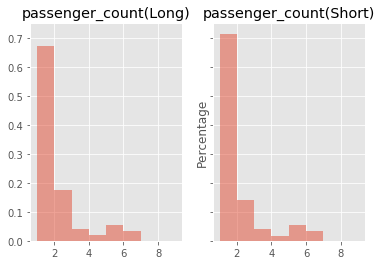

In [39]:
plt.close()
fig, axes = plt.subplots(1, 2, sharey=True)
ax0, ax1= axes.flatten()
ax0.hist(long['passenger_count'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9],normed=1,alpha=0.5)
ax1.hist(short['passenger_count'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9],normed=1,alpha=0.5)
ax0.set_title('passenger_count(Long)')
ax1.set_title('passenger_count(Short)')
plt.ylabel('Percentage')
plt.show()

In [40]:
pick_h_lo = list(map(time_obj, long['tpep_pickup_datetime']))
drop_h_lo = list(map(time_obj, long['tpep_dropoff_datetime']))
pick_h_sh = list(map(time_obj, short['tpep_pickup_datetime']))
drop_h_sh = list(map(time_obj, short['tpep_dropoff_datetime']))

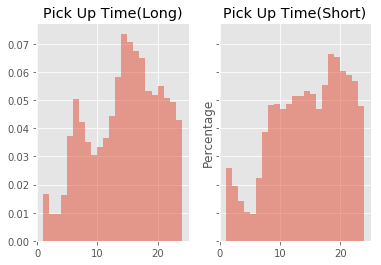

In [42]:
bi_24 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
#### Pick Up ####
plt.close()
fig, axes = plt.subplots(1, 2, sharey=True)
ax0, ax1= axes.flatten()
ax0.hist(pick_h_lo, bins=bi_24, normed=1, alpha=0.5)
ax1.hist(pick_h_sh, bins=bi_24, normed=1, alpha=0.5)
ax0.set_title('Pick Up Time(Long)')
ax1.set_title('Pick Up Time(Short)')
plt.ylabel('Percentage')
plt.show()

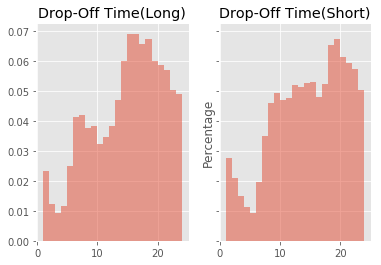

In [43]:
#### Drop off ####
plt.close()
fig, axes = plt.subplots(1, 2, sharey=True)
ax0, ax1= axes.flatten()
ax0.hist(drop_h_lo, bins=bi_24, normed=1, alpha=0.5)
ax1.hist(drop_h_sh, bins=bi_24, normed=1, alpha=0.5)
ax0.set_title('Drop-Off Time(Long)')
ax1.set_title('Drop-Off Time(Short)')
plt.ylabel('Percentage')
plt.show()